**Import Libaries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import random
import warnings
warnings.filterwarnings("ignore")

**Understand data**

*Read data*

In [2]:
data = pd .read_csv(r"C:\Users\shimaamohyi\Downloads\Arabian Traning AI\diabetes.csv")

*data size*

In [3]:
Data = data.shape
print(" Rows * Cols \n" ,  Data)

 Rows * Cols 
 (768, 9)


*Read the first five row*

In [4]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


*Read the first last row*

In [5]:
data.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


*summarize Information about data*

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


*Summarize Statstical information about data*

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*Data types*

In [8]:
data.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

*Check missing values* 

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data_types=data.dtypes
unique_Feature = data.nunique()
pd.DataFrame({"Dtypes": data_types ,"unique_values":unique_Feature }).T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Dtypes,int64,int64,int64,int64,int64,float64,float64,int64,int64
unique_values,17,136,47,51,186,248,517,52,2


***Understand the distribution of the Target feature***

In [12]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

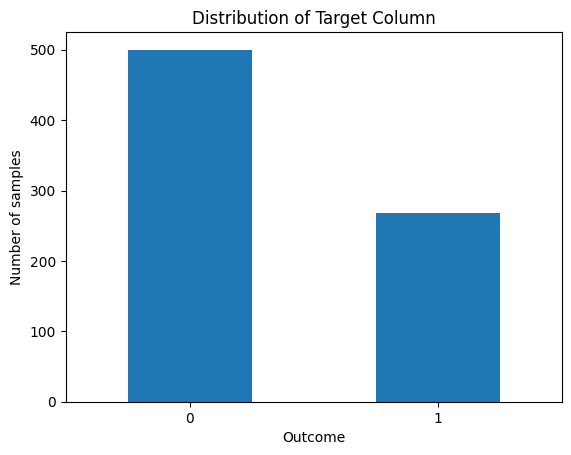

In [13]:
data['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Number of samples')
plt.title('Distribution of Target Column')
plt.xticks(rotation=0)
plt.show()


*Outliers Detectaion*

In [14]:
# using the Ratio :
original_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' ,'DiabetesPedigreeFunction','Age']

outlier_percent = {
    col: round((((data[col] < data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))) |
                 (data[col] > data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)))).sum()
                 / len(data)) * 100, 2)
    for col in original_cols if pd.api.types.is_numeric_dtype(data[col])
}

pd.DataFrame.from_dict(outlier_percent, orient='index', columns=['Outliers ratio']).T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outliers ratio,0.52,0.65,5.86,0.13,4.43,2.47,3.78,1.17


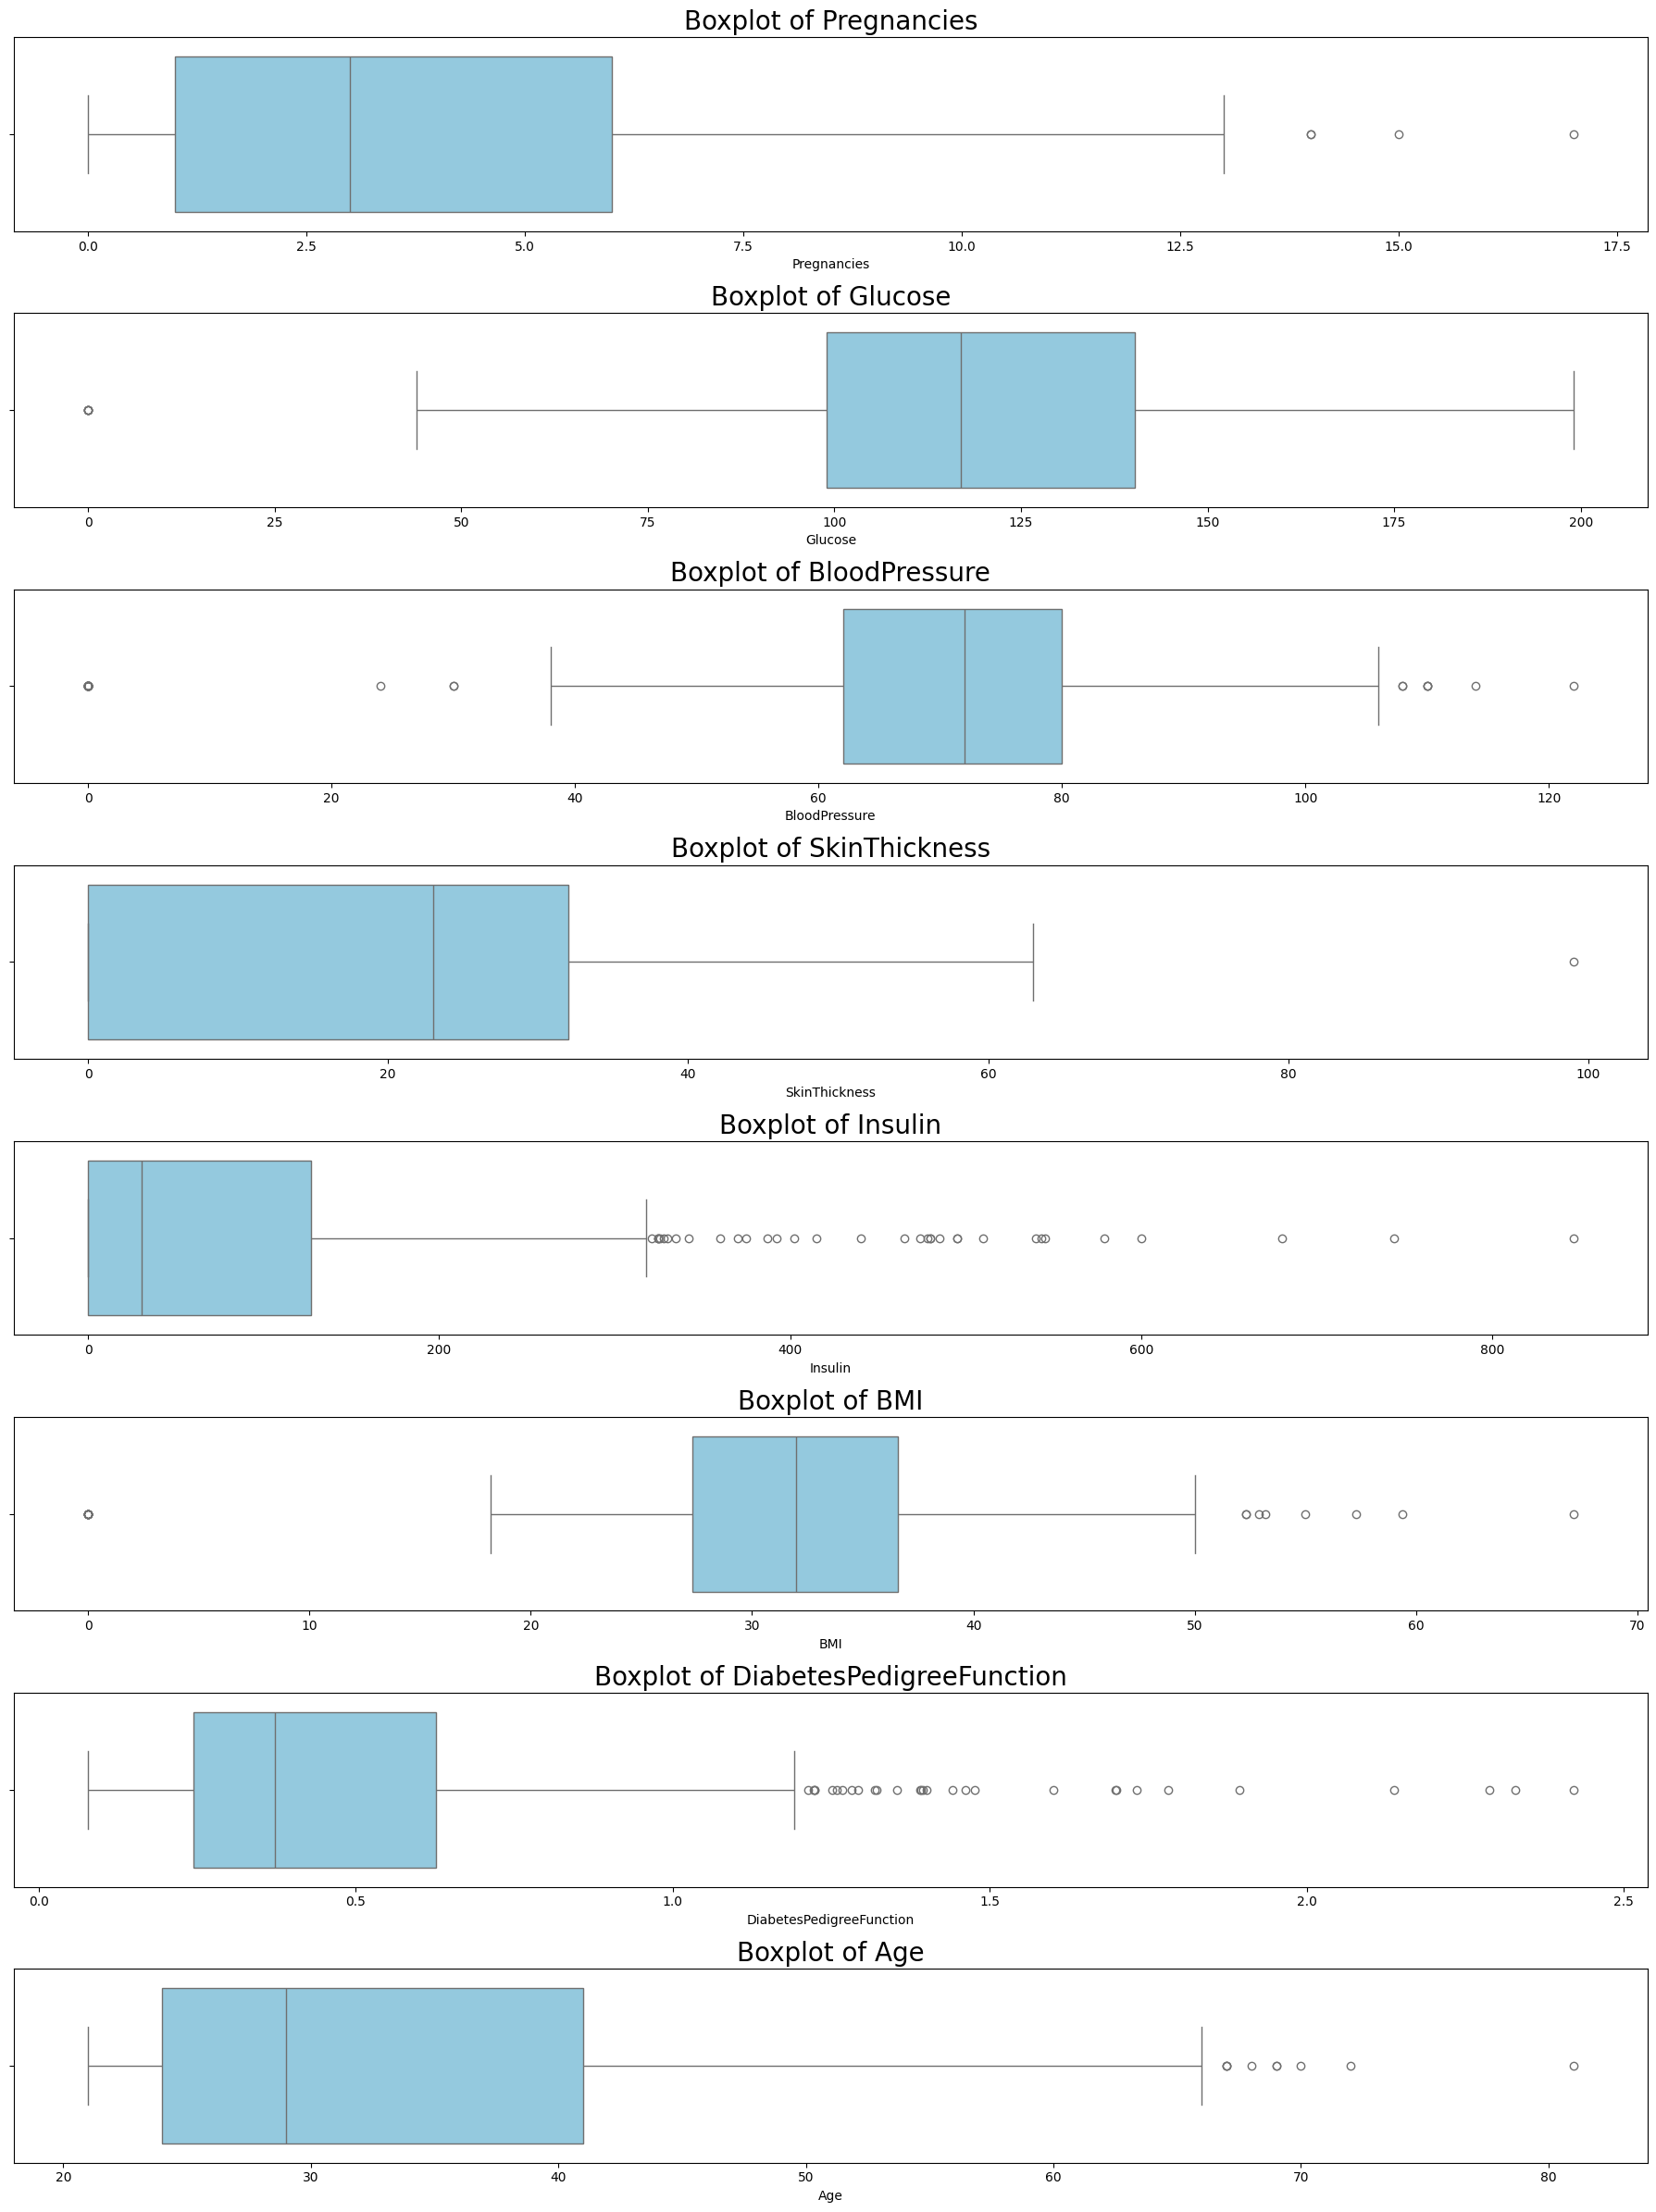

In [15]:
Outliers_distribution = data.drop(columns=['Outcome'])
numeric_cols = Outliers_distribution.select_dtypes(include='number').columns
plt.figure(figsize=(18, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=Outliers_distribution[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=20)

plt.tight_layout()
plt.show()

In [16]:
data_types=data.dtypes
unique_Feature = data.nunique()
pd.DataFrame({"Dtypes": data_types ,"unique_values":unique_Feature }).T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Dtypes,int64,int64,int64,int64,int64,float64,float64,int64,int64
unique_values,17,136,47,51,186,248,517,52,2


**Data distribution of each feature**

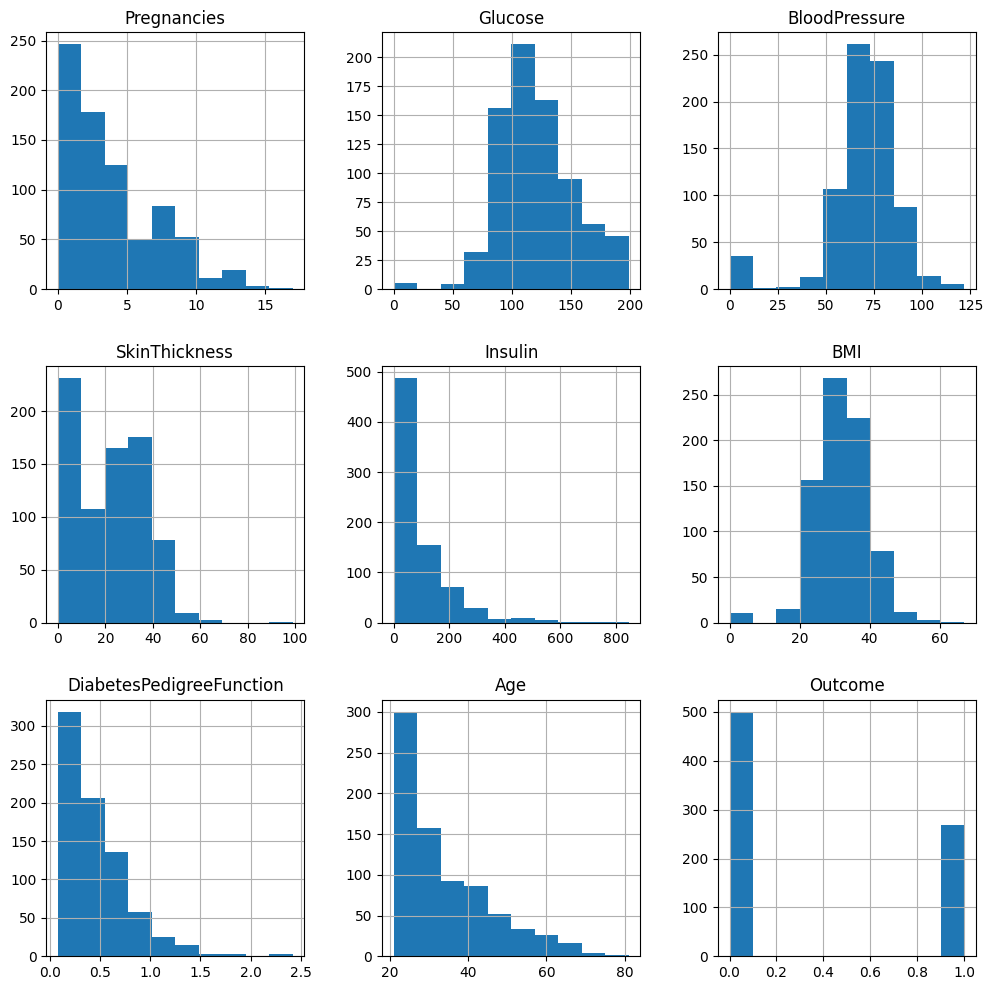

In [17]:
data.hist(figsize=(12, 12))
plt.show()

**The corrlations between the features**

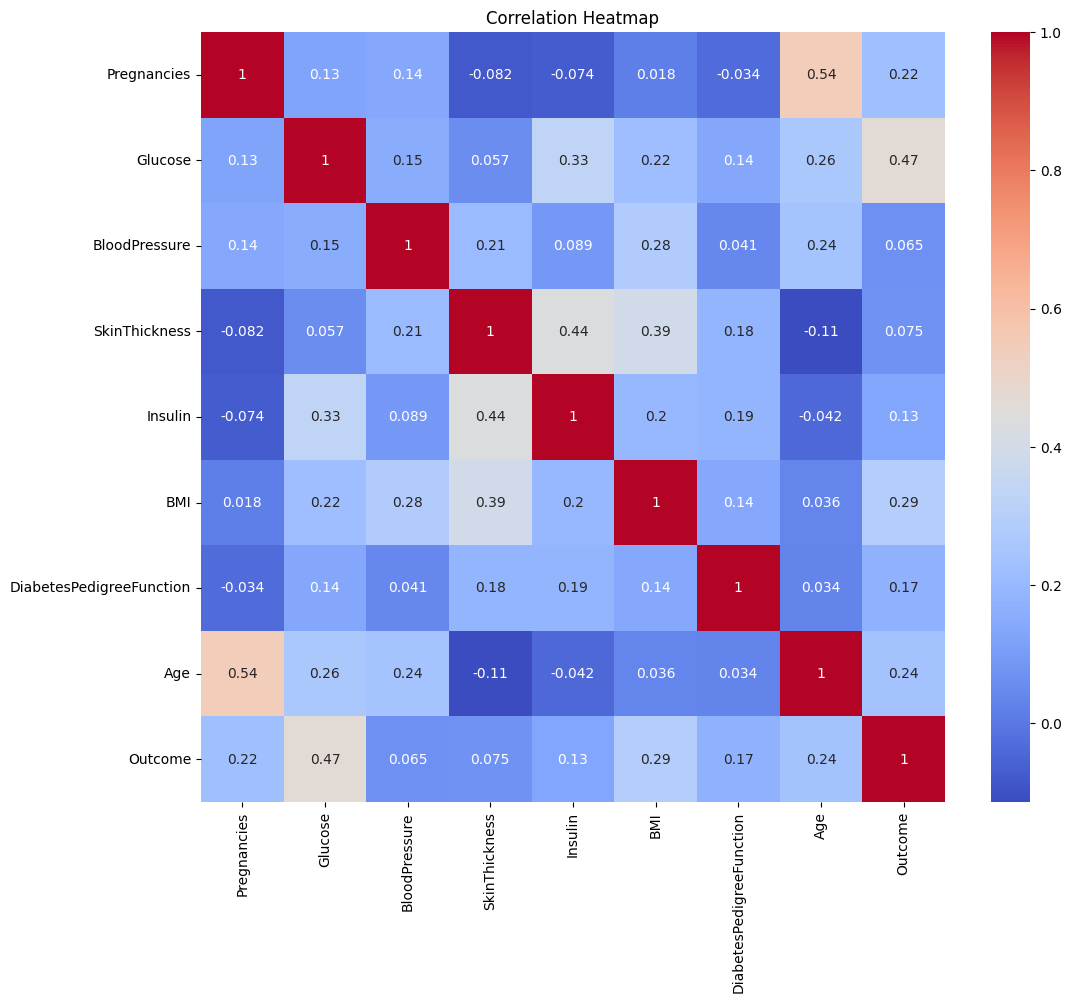

In [18]:
correlations = data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Showing the relationship between each feature and Target column (Heatmap)**

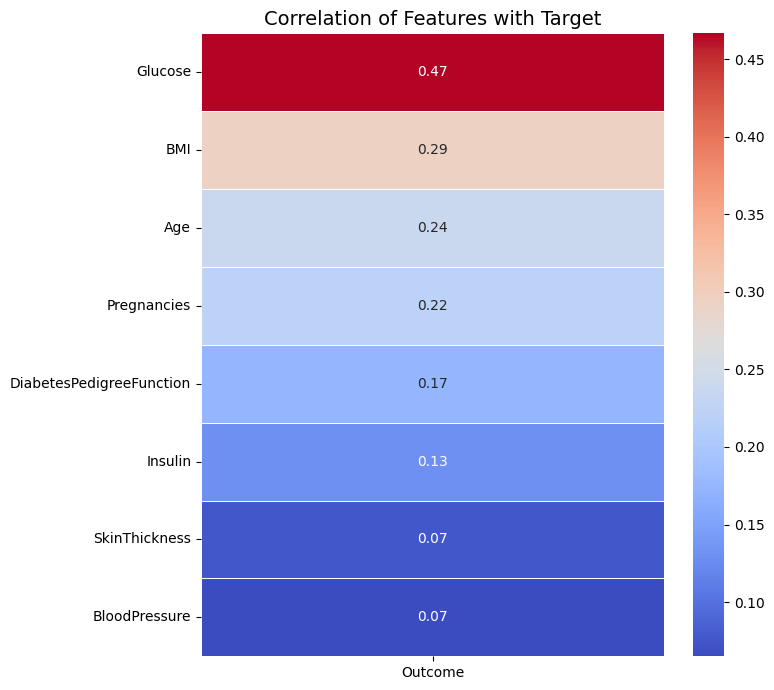

In [19]:
corr = data.corr(numeric_only=True)
corr_with_target = corr['Outcome'].drop('Outcome').sort_values(ascending=False).to_frame()

plt.figure(figsize=(8, 7))
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation of Features with Target", fontsize=14)
plt.tight_layout()
plt.show()


**Data Preprocessing**

*Treat outliers*

In [20]:
def cap_outliers(data,Features):
    for col in Features:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower, upper)
    return data
Features = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' ,'DiabetesPedigreeFunction','Age']

In [21]:
data.to_csv("diabetes_Cleaned.csv", index=False)

In [22]:
Data_processed = pd.read_csv(r"C:\Users\shimaamohyi\Downloads\Arabian Traning AI\diabetes_Cleaned.csv")

In [23]:
Data_processed.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


**Build a Machine Learning Model**

Decision Tree

*Drop target feature*

In [28]:
X =  Data_processed.drop("Outcome",axis=1)
y = Data_processed["Outcome"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Train model*

In [33]:
from sklearn.tree import plot_tree

# PRE-Pruning
model = DecisionTreeClassifier(max_depth=3, random_state=42)
#Train Model
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


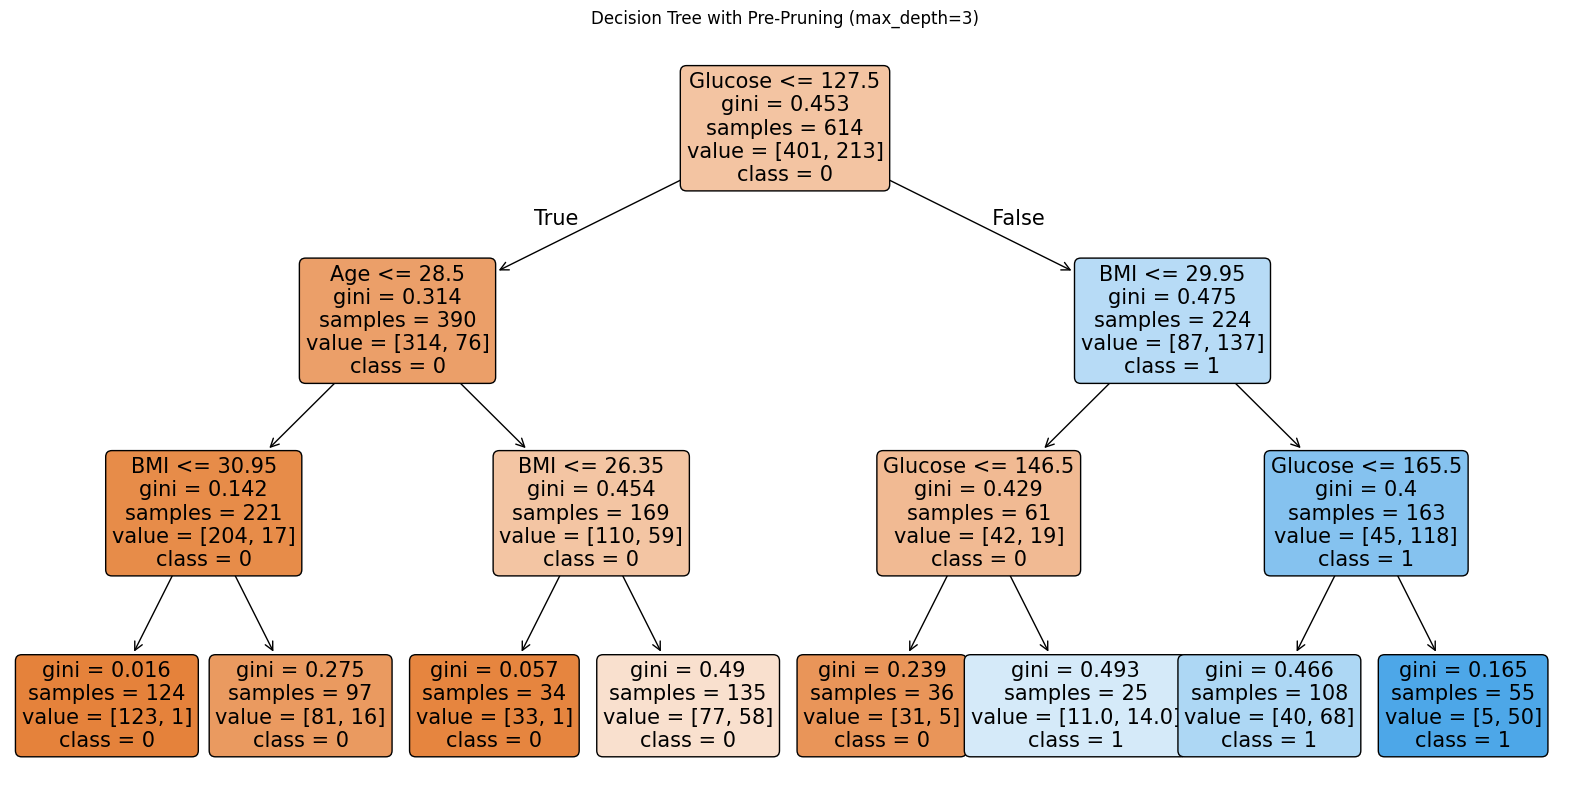

In [34]:
# Plotting the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=X.columns,
          class_names=['0', '1'],  #['Not Patiant', 'Patiant']
          filled=True,
          rounded=True,
          fontsize=15)
plt.title("Decision Tree with Pre-Pruning (max_depth=3)")
plt.show()


In [35]:
# Select a random case from the test set
random_index = random.randint(0, X_test.shape[0] - 1)
sample = X_test.iloc[random_index]
Actual_label = y_test.iloc[random_index]

# prediction - reshape sample to 2D array
prediction = model.predict([sample.values])[0]


print("Selected Random Case:")
print(sample)
print(f"\nActual Label: {Actual_label}")
print(f"Predicted:    {prediction}")


Selected Random Case:
Pregnancies                  2.000
Glucose                     74.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.102
Age                         22.000
Name: 81, dtype: float64

Actual Label: 0
Predicted:    0


*Prediction*

In [36]:
y_pred = model.predict(X_test)

*Evaluation*

In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



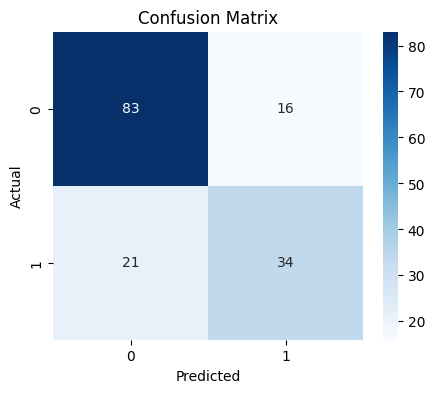

In [38]:
# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Random Forest**

In [76]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

*Train model*

In [77]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


*Prediction*

In [78]:
y_pred_rf = rf_model.predict(X_test)

In [79]:
#Select a random case from the data
random_index = random.randint(0, X_test.shape[0] - 1)
sample = X_test.iloc[random_index]
actual_label = y_test.iloc[random_index]

# prediction
prediction = rf_model.predict([sample])[0]
print("Random Sample:")
print(sample)
print(f"\nActual Label: {actual_label}")
print(f"Predicted: {prediction}")

Random Sample:
Pregnancies                   0.00
Glucose                     131.00
BloodPressure                 0.00
SkinThickness                 0.00
Insulin                       0.00
BMI                          43.20
DiabetesPedigreeFunction      0.27
Age                          26.00
Name: 78, dtype: float64

Actual Label: 1
Predicted: 1


*Evaluation*

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



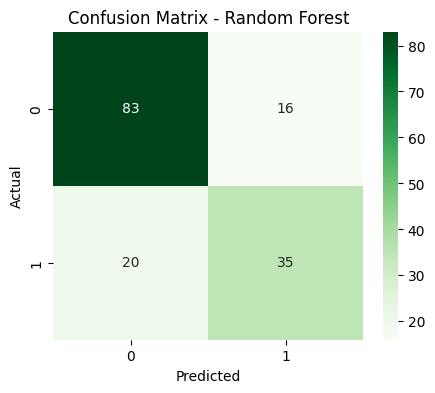

In [81]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**XG-Boast**

In [82]:
#intilize model
xgb_model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, random_state=42)

In [83]:
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


*Prediction*

In [84]:
y_pred_xgb = xgb_model.predict(X_test)

In [85]:
random_index = random.randint(0, X_test.shape[0] - 1)
sample = X_test.iloc[random_index]
actual_label = y_test.iloc[random_index]

prediction = xgb_model.predict([sample])[0]

print("Random Case:")
print(sample)
print(f"\nActual Label: {actual_label}")
print(f"Predicted Label: {prediction}")

Random Case:
Pregnancies                  8.000
Glucose                     74.000
BloodPressure               70.000
SkinThickness               40.000
Insulin                     49.000
BMI                         35.300
DiabetesPedigreeFunction     0.705
Age                         39.000
Name: 462, dtype: float64

Actual Label: 0
Predicted Label: 0


*Evaluation*

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.7402597402597403

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



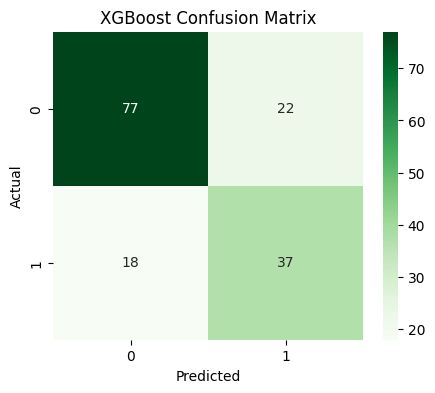

In [86]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Accuracy Comparison of the Models**

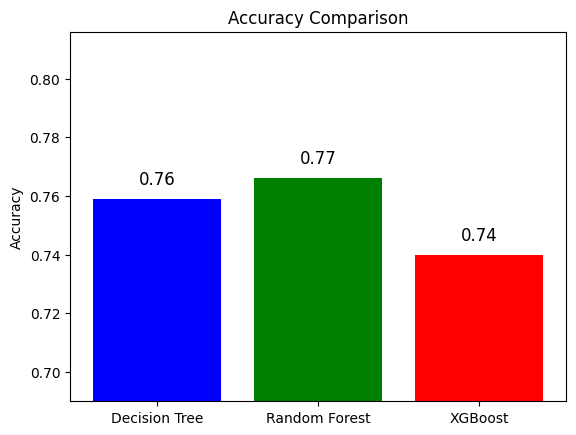

In [87]:
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.759, 0.766, 0.740]
colors = ['blue', 'green', 'red']


plt.bar(models, accuracies, color=colors)

# To write the accuracy on the top of each bar
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.005, f"{accuracies[i]:.2f}", ha='center', fontsize=12)

plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)
plt.show()

**Hyperparameter Tuning**

**Decision Tree grid Search**

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
dt_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],   
    'max_depth': [None, 5, 10, 15, 20, 25],         
    'min_samples_split': [2, 5, 10, 15, 20],        
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],      
    'max_features': [None, 'sqrt', 'log2']          
}


In [90]:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [91]:
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, dt_params, cv=5)

**Train**

In [92]:
grid_dt.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 5, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


*Evaluation*

In [93]:
print("Best Decision Tree Accuracy:", grid_dt.best_score_)
print("Best Decision Tree Parameters:", grid_dt.best_params_)

Best Decision Tree Accuracy: 0.767119818739171
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [94]:
best_dt = grid_dt.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.7792207792207793


*Random forest grid Search*

In [95]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

In [97]:
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, rf_params, cv=5)

**Train**

In [98]:
grid_rf.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [100]:
cv_acc = grid_rf.best_score_        #  Accuracy of Cross Validation
test_acc = grid_rf.score(X_test, y_test)  # Accuracy of test data


In [101]:
print("Best Random Forest CV Accuracy:", cv_acc)
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Test Accuracy:", test_acc)

Best Random Forest CV Accuracy: 0.7834199653471945
Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Test Accuracy: 0.7337662337662337


*XG-Boost grid Search*

In [102]:
xgb_params = {
    'n_estimators': [100, 200, 300],       
    'max_depth': [3, 5, 7, 10],         
    'learning_rate': [0.01, 0.1, 0.2],       
    'subsample': [0.8, 1.0],               
    'colsample_bytree': [0.8, 1.0],        
    'gamma': [0, 0.1, 0.2]                
}

In [103]:
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

In [104]:
grid_xgb = GridSearchCV(
    xgb,
    xgb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [105]:
grid_xgb.fit(X_train, y_train)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [106]:
print("Best XGBoost Accuracy:", grid_xgb.best_score_)
print("Best XGBoost Parameters:", grid_xgb.best_params_)


Best XGBoost Accuracy: 0.7801412768226043
Best XGBoost Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [107]:
best_xgb = grid_xgb.best_estimator_
test_acc = best_xgb.score(X_test, y_test)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.7597402597402597


**Accuracy Comparison of the Models after apply hypter paramters**

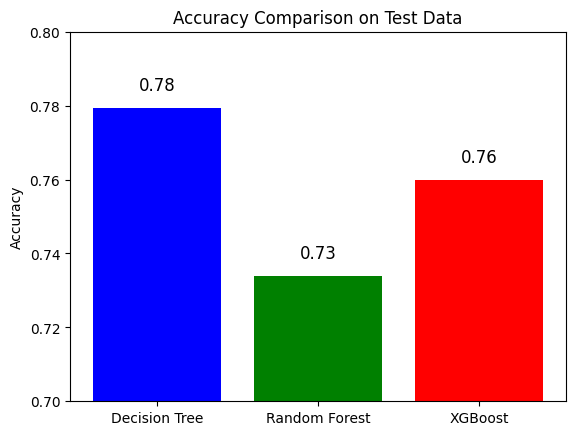

In [108]:
acc_dt = accuracy_score(y_test, grid_dt.best_estimator_.predict(X_test))
acc_rf = accuracy_score(y_test, grid_rf.best_estimator_.predict(X_test))
acc_xgb = accuracy_score(y_test, grid_xgb.best_estimator_.predict(X_test))


models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [acc_dt, acc_rf, acc_xgb]
colors = ['blue', 'green', 'red']

plt.bar(models, accuracies, color=colors)

# To write the accuracy on the top of each bar
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.005, f"{accuracies[i]:.2f}", ha='center', fontsize=12)

plt.title("Accuracy Comparison on Test Data")
plt.ylabel("Accuracy")
plt.ylim(0.70, 0.80)
plt.show()

*Calculating prediction probabilities*

In [111]:
y_probs_dt = model.predict_proba(X_test)[:, 1]
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

*Calculate ROC and AUC scores for each model*

In [112]:
# ROC and AUC of Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
# ROC and AUC of RandomForest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
# ROC and AUC of  XG-Boost 
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)

In [113]:
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

*Plotting the graph*

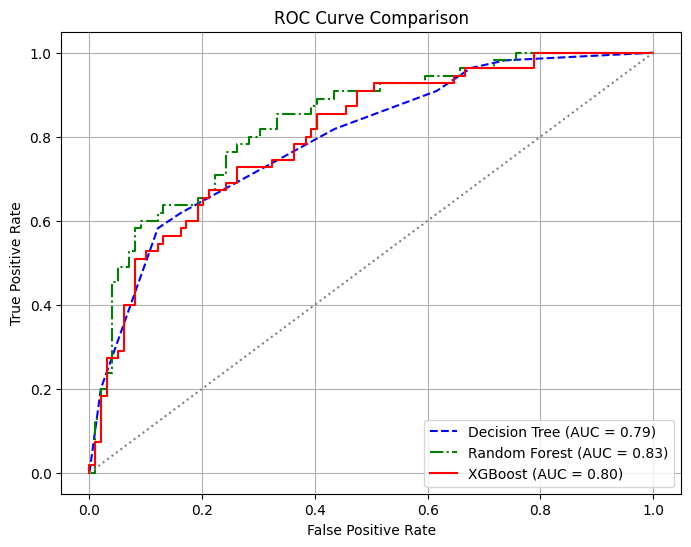

In [114]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", linestyle='--', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linestyle='-.', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", linestyle='-', color='red')


plt.plot([0, 1], [0, 1], color='gray', linestyle=':')   # Random classifer line

# 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [115]:
import pickle

# Random Forest
with open("rf_model.pkl", "wb") as f:
    pickle.dump(grid_rf.best_estimator_, f)

# XGBoost
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(grid_xgb.best_estimator_, f)

# Decision Tree
with open("dt_model.pkl", "wb") as f:
    pickle.dump(grid_dt.best_estimator_, f)


In [ ]:
import streamlit as st
import pickle
import numpy as np

# Load the models
models = {
    "Random Forest": pickle.load(open("rf_model.pkl", "rb")),
    "XGBoost": pickle.load(open("xgb_model.pkl", "rb")),
    "Decision Tree": pickle.load(open("dt_model.pkl", "rb"))
}

st.title("Diabetes Prediction App")

# Model selection
model_choice = st.selectbox("Choose a model:", list(models.keys()))

# User input
st.subheader("Enter patient details:")

Pregnancies = st.number_input("Pregnancies", min_value=0, step=1)
Glucose = st.number_input("Glucose Level", min_value=0)
BloodPressure = st.number_input("Blood Pressure", min_value=0)
SkinThickness = st.number_input("Skin Thickness", min_value=0)
Insulin = st.number_input("Insulin", min_value=0)
BMI = st.number_input("BMI", min_value=0.0)
DiabetesPedigreeFunction = st.number_input("Diabetes Pedigree Function", min_value=0.0)
Age = st.number_input("Age", min_value=0, step=1)

if st.button("Predict"):
    model = models[model_choice]
    data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness,
                      Insulin, BMI, DiabetesPedigreeFunction, Age]])
    prediction = model.predict(data)
    if prediction[0] == 1:
        st.error("⚠ The patient is likely to have diabetes.")
    else:
        st.success("✅ The patient is unlikely to have diabetes.")
